# Objetivo do Projeto

Analisar a base dados Automobile com o fim de prever preços de veículos através de análise de dados e algoritmo de Machine Learning. 

# Coletando a Base de Dados
- Origem: https://archive.ics.uci.edu/dataset/10/automobile

# Bibliotecas Necessárias Para Aplicação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
dataset_carros = pd.read_csv('/home/yurilima/Downloads/automobile/imports-85.data', sep=',')

In [3]:
dataset_carros.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# Tratando os Dados Para a Análise

- Editando a lista de colunas para melhor entendimento dos dados e traduzindo para o Português. 

In [4]:
colunas_portugues = [
    "marcas",
    "níveis de perda normalizados",
    "fabricante",
    "tipo de combustível",
    "aspiração do motor",
    "número de portas",
    "estilo do carro",
    "tração",
    "localização do motor",
    "distância entre eixos",
    "comprimento",
    "largura",
    "altura",
    "peso do carro",
    "tipo de motor",
    "número de cilindros",
    "tamanho do motor",
    "sistema de combustível",
    "diâmetro do cilindro",
    "curso do pistão",
    "taxa de compressão",
    "potência do motor",
    "rpm máximo",
    "consumo de combustível na cidade",
    "consumo de combustível na estrada",
    "preço"
]

In [5]:
dataset_carros.columns = colunas_portugues

In [6]:
dataset_carros.head()

,marcas,níveis de perda normalizados,fabricante,tipo de combustível,aspiração do motor,número de portas,estilo do carro,tração,localização do motor,distância entre eixos,...,tamanho do motor,sistema de combustível,diâmetro do cilindro,curso do pistão,taxa de compressão,potência do motor,rpm máximo,consumo de combustível na cidade,consumo de combustível na estrada,preço
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


- Foi notado que na base de dados existem alguns valores representados pelo caracter <strong>'?'</strong>, então que seja possível executar interpolação para os dados numéricos todos os <strong>'?'</strong> foram substituídos por valores nulos nativos da biblioteca Numpy. 
As colunas afetadas pelo código foram:<br>
<table>
  <tr>
    <th>níveis de perda normalizados</th>
    <th>número de portas</th>
    <th>diâmetro do cilindro</th>
    <th>curso do pistão</th>
    <th>potência do motor</th>
    <th>rpm máximo</th>
    <th>preço</th>
  </tr>
</table>

In [7]:
def to_nan(x):
    if x == '?':
        return np.nan
    else:
        return x

for coluna in dataset_carros:
    dataset_carros[coluna] = dataset_carros[coluna].apply(to_nan)

dataset_carros.head()

,marcas,níveis de perda normalizados,fabricante,tipo de combustível,aspiração do motor,número de portas,estilo do carro,tração,localização do motor,distância entre eixos,...,tamanho do motor,sistema de combustível,diâmetro do cilindro,curso do pistão,taxa de compressão,potência do motor,rpm máximo,consumo de combustível na cidade,consumo de combustível na estrada,preço
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Tratando Valores Nulos

De acordo com as informações obtidas do dataset_carros, é notável que a maior parte dos dados faltantes está no campo de **níveis de perda normalizadas**, totalizando 40 dados nulos.

In [8]:
dataset_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   marcas                             204 non-null    int64  
 1   níveis de perda normalizados       164 non-null    object 
 2   fabricante                         204 non-null    object 
 3   tipo de combustível                204 non-null    object 
 4   aspiração do motor                 204 non-null    object 
 5   número de portas                   202 non-null    object 
 6   estilo do carro                    204 non-null    object 
 7   tração                             204 non-null    object 
 8   localização do motor               204 non-null    object 
 9   distância entre eixos              204 non-null    float64
 10  comprimento                        204 non-null    float64
 11  largura                            204 non-null    float64

E no que se trata dos outros valores faltantes em média, existe 3, contudo, essas linhas serão removidas, pois não terá grande impacto na integridade dos dados. 

In [9]:
valores_nulos = 0
colunas_com_valores_nulos = 0
for coluna in dataset_carros:
    nulos = dataset_carros[coluna].isnull().sum()
    if nulos > 0 and nulos != 40:
        valores_nulos += nulos
        colunas_com_valores_nulos += 1
print(f'A média valores nulos entre as colunas que possuem essa caracteristica, '
      f'menos na de níveis de perda normalizados é de: {valores_nulos/colunas_com_valores_nulos}')


A média valores nulos entre as colunas que possuem essa caracteristica, menos na de níveis de perda normalizados é de: 3.0


Para a coluna de níveis de perda normalizados a estrategia utilizada para preenchimento dos dados vai ser feita analisando qual parametro descritivo dessa série de dados vai cumprir essa tarefa sem comprometer os dados. Contudo, é necessario mudar o tipo de dado da série para float com o objetivo de melhorar análise.

In [10]:
dataset_carros['níveis de perda normalizados'] = dataset_carros['níveis de perda normalizados'].astype('float')

Analisando Gráficamente os dados:

In [11]:
perdas_normalizada = dataset_carros['níveis de perda normalizados']
perdas_normalizada.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: níveis de perda normalizados, dtype: float64

Serão utilizados para Análise gráfica as estatísitcas:
<table>
  <tr>
    <th>Médiath>
    <th>Mediaana</th>
    <th>Quartis 25%,50%,75%</th>
  </tr>
</table>

[Text(0.5, 1.0, 'Preenchendo com a Quartil 75%'),
 Text(0.5, 0, 'Perdas Normalizadas')]

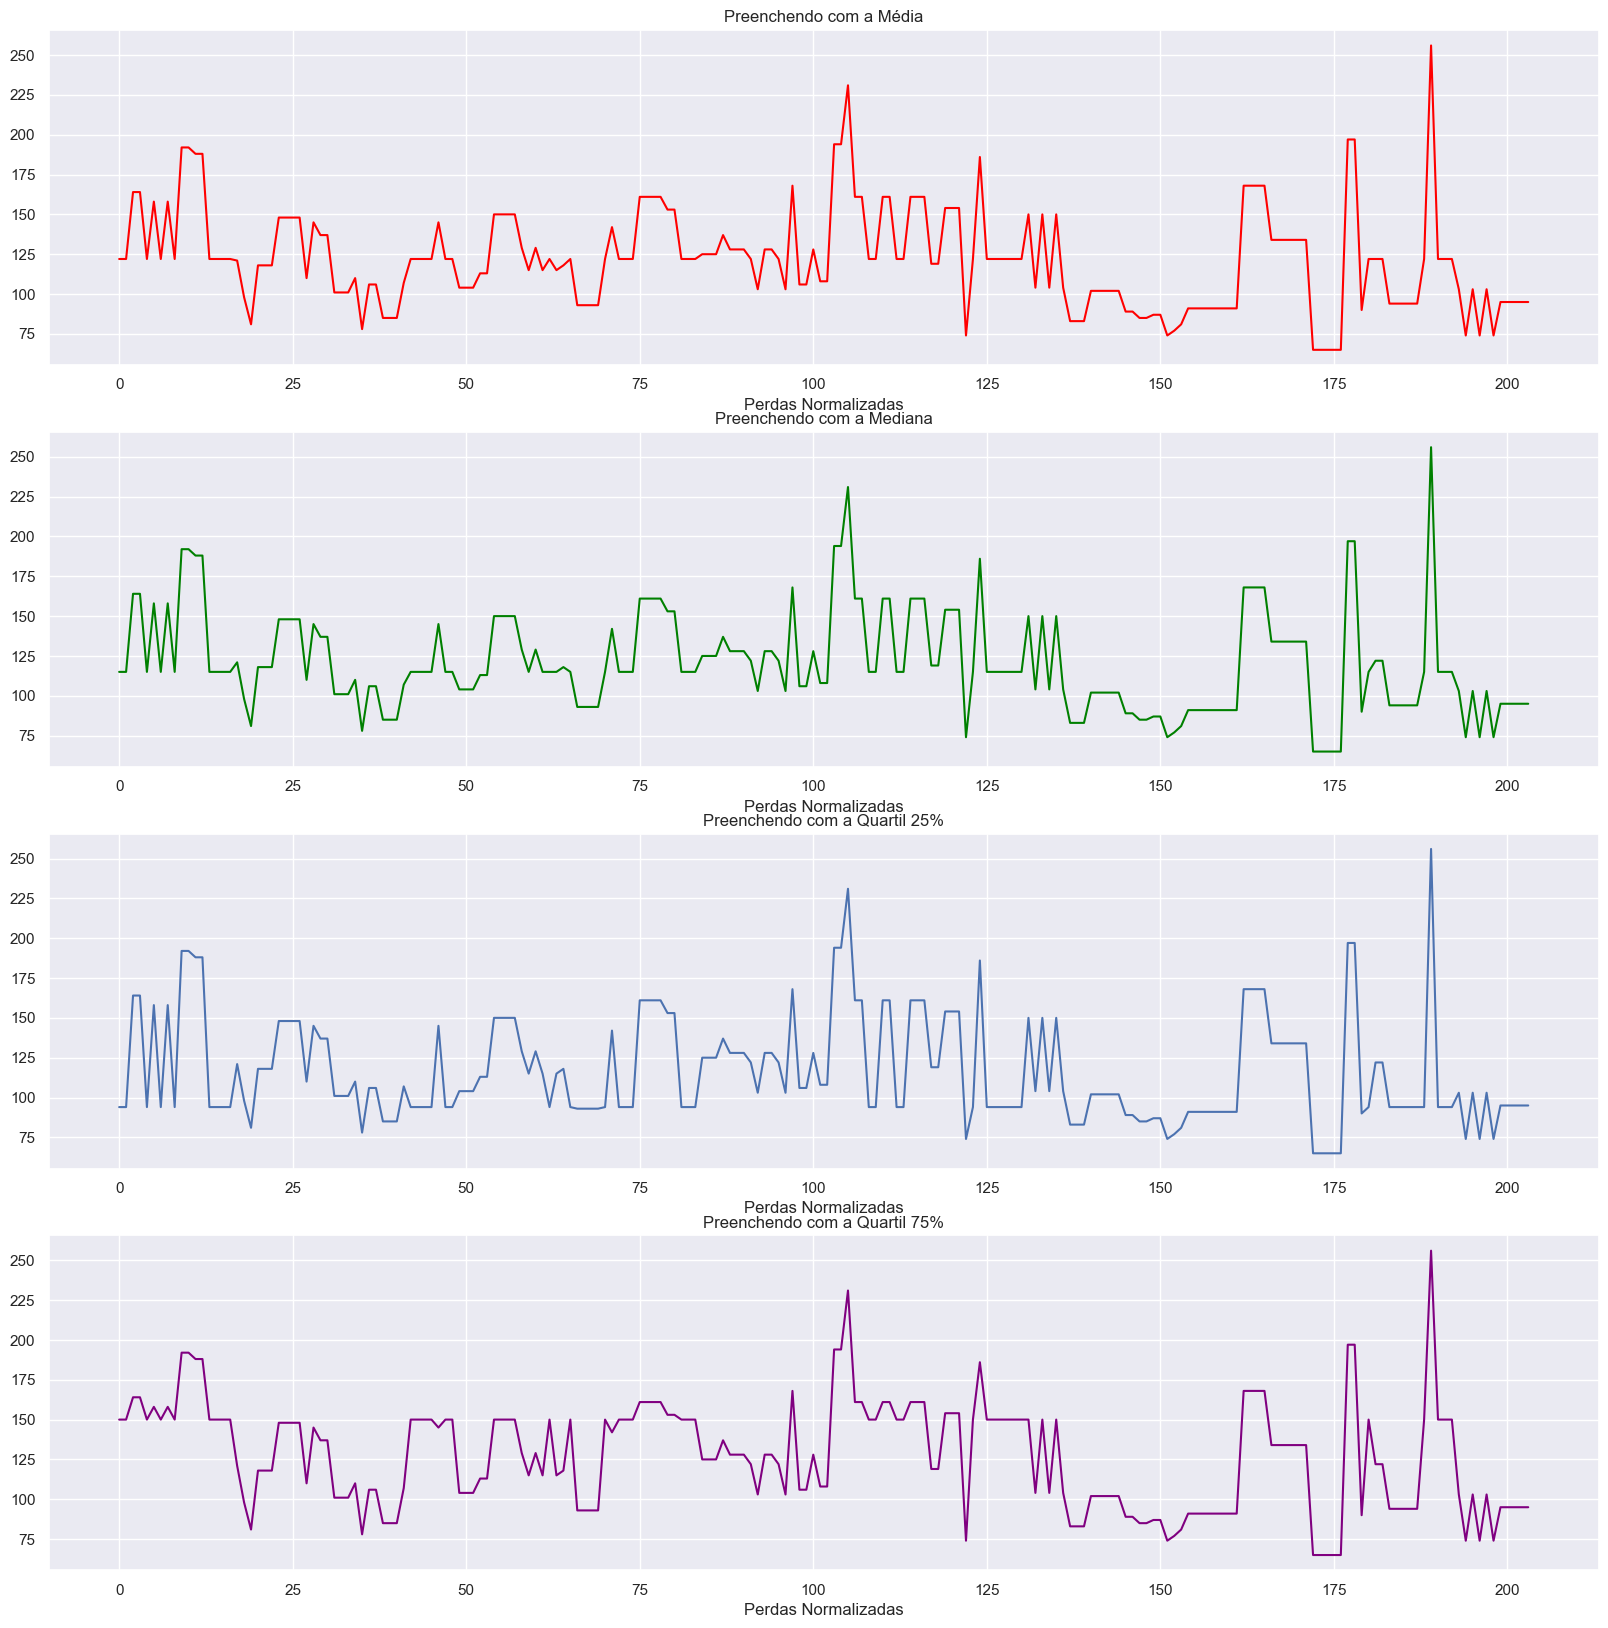

In [12]:
media_dados = perdas_normalizada.fillna(perdas_normalizada.mean())
mediana_dados = perdas_normalizada.fillna(perdas_normalizada.median())
quartis_dados = [perdas_normalizada.fillna(perdas_normalizada.quantile(0.25)),
                                     perdas_normalizada.fillna(perdas_normalizada.quantile(0.75))]

fig, ax = plt.subplots(4,1, figsize=(20, 20))

ax[0].plot(media_dados, color='red')
ax[1].plot(mediana_dados,color='green')
ax[2].plot(quartis_dados[0])
ax[3].plot(quartis_dados[1],color='purple')

ax[0].set(title='Preenchendo com a Média', xlabel='Perdas Normalizadas')
ax[1].set(title='Preenchendo com a Mediana', xlabel='Perdas Normalizadas')
ax[2].set(title='Preenchendo com a Quartil 25%', xlabel='Perdas Normalizadas')
ax[3].set(title='Preenchendo com a Quartil 75%', xlabel='Perdas Normalizadas')

Como pode ser visto nos gráficos acima, a distruibuição dos dados com os quatro tipos de preenchimentos escolhidos, apresentam comportamento similar em uma distruibuição de linha. Contudo o preenhcimento com o quartil 75% parece ter algumas diferenças na sua distribuição que sugerem que ele possa ter uma distruição mais próxima da Normal. Para confirmar essa suspeita, é possível utilizar gráficos Boxplot para analisar essas diferentes séries de dados.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


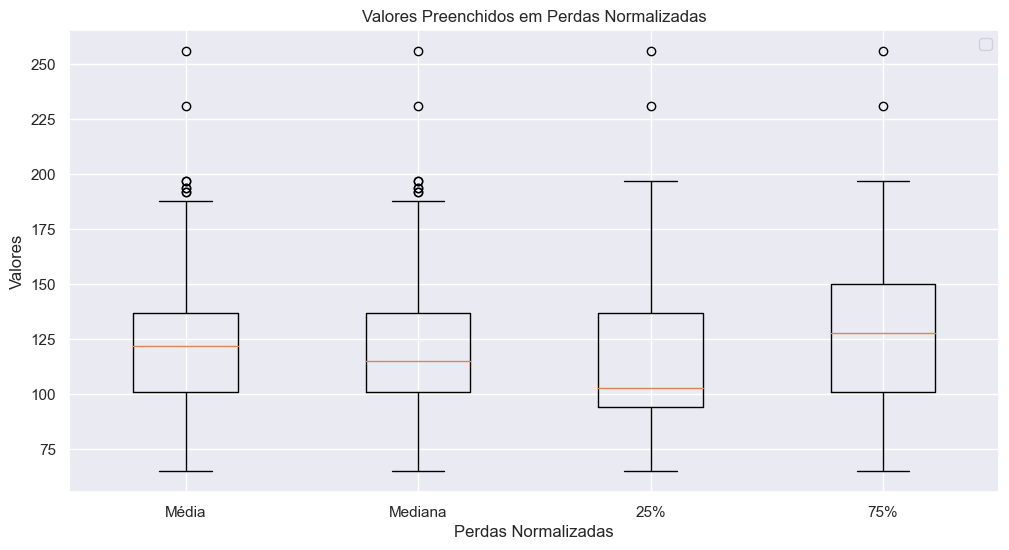

In [13]:
nomes_das_categorias = ['Média','Mediana','25%', '75%']
plt.figure(figsize=(12, 6))

plt.boxplot([media_dados, mediana_dados, quartis_dados[0], quartis_dados[1]])


plt.title('Valores Preenchidos em Perdas Normalizadas')
plt.xlabel('Perdas Normalizadas')
plt.ylabel('Valores')
plt.xticks(range(1, len(nomes_das_categorias) + 1), nomes_das_categorias)

plt.legend()

plt.show()

De acordo com os gráficos acima é notável que a distruição preenchida com o quartil de 75%. Por esse motivo o valor desse desse preenchimento será atribuído para a coluna de **níveis de perda normalizados**

In [14]:
dataset_carros['níveis de perda normalizados'] = quartis_dados[1]

Para continuar a análise dos dados se faz necessário retirar as linhas que possuem valores nulos. 

In [15]:
dataset_carros.dropna(inplace=True)
dataset_carros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 203
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   marcas                             192 non-null    int64  
 1   níveis de perda normalizados       192 non-null    float64
 2   fabricante                         192 non-null    object 
 3   tipo de combustível                192 non-null    object 
 4   aspiração do motor                 192 non-null    object 
 5   número de portas                   192 non-null    object 
 6   estilo do carro                    192 non-null    object 
 7   tração                             192 non-null    object 
 8   localização do motor               192 non-null    object 
 9   distância entre eixos              192 non-null    float64
 10  comprimento                        192 non-null    float64
 11  largura                            192 non-null    float64

# Escolhendo os melhores parametros para a Análise

Antes de escolher os campos que farão parte da análise de machine learning, deve ser feita uma pergunta: **"Quais são as informações que são mais relavantes que impactam no preço de produção de um carro?"**
A base de dados carregam informações que são relevantes quanto ao preço, tanto para o custo de produção quanto para o consumidor. Contudo, essa análise focará nas informações que mais impactam na indústria. 
- Critério de Escolha ---> Campos referentes ao material que compôe o carro ou que tem uma tecnologia que impacta no preço do veículo.
Os campos escolhidos foram:
<table border="1">
        <tr>
            <td>Marca do carro</td>
            <td>Número de cilindros do motor</td>
            <td>Potência do motor</td>
            <td>Consumo de combustível na cidade</td>
            <td>Consumo de combustível na estrada</td>
            <td>Comprimento do carro</td>
            <td>Largura do carro</td>
            <td>Altura do carro</td>
            <td>Peso do carro</td>
            <td>Tipo de sistema de combustível</td>
            <td>Tipo de motor</td>
            <td>Preço do carro</td>
        </tr>
</table>

Dessa forma, é separado do DataFrame, apenas com essas colunas. Contudo, é possível checar se a hipotése tem fundamento correlacionando as informações do dataset transdormando todos os dados em dados numéricos.

In [31]:
dataset_carros['preço'] = dataset_carros['preço'].astype('float')
for coluna in dataset_carros:
    tipo = dataset_carros[coluna].dtype
    if tipo == 'object':
        target_encoder = ce.TargetEncoder()

        # Ajustar o codificador ao conjunto de treinamento
        target_encoder.fit(dataset_carros[coluna], dataset_carros['preço'])

        # Aplicar o codificador ao conjunto de treinamento e teste
        dataset_carros[coluna] = target_encoder.transform(dataset_carros[coluna], 
                                                              dataset_carros['preço'])
        print(f'______{coluna}_______')
        print(dataset_carros[coluna].unique())

______marcas_______
[13631.51484156 12818.28314097 12969.99790005 13438.54484848
 13566.46913379 13328.07507006]
______níveis de perda normalizados_______
[14180.27047553 13322.37818148 13416.36549205 13340.41894654
 13420.88721834 13140.02705916 13159.39293724 13161.68993752
 13189.85968295 13136.75713762 13173.63848971 13449.85395058
 13159.97201173 13138.57149519 13167.17119846 13181.54784279
 13206.73813254 13227.9522084  13212.47741556 13162.64127955
 13208.31418567 13208.88361721 13608.2173879  13646.26533176
 13246.57338133 13202.94923955 13172.32511524 13141.60653552
 13149.38046328 13260.38718211 13168.71270643 13290.24079961
 13373.11379596 13364.29205282 13146.60495269 13266.0942186
 13425.55526327 13143.37473554 13175.71364256 13195.59451334
 13140.45713673 13169.93921525 13117.29024771 13230.1033494
 13208.58293848 13333.0457643  13318.43351811 13170.43012079
 13221.77340989 13449.20944906]
______fabricante_______
[13342.50000267 13395.9432687  13664.97372147 13131.6312483

<AxesSubplot:title={'center':'Correlção Entre As Variáveis'}>

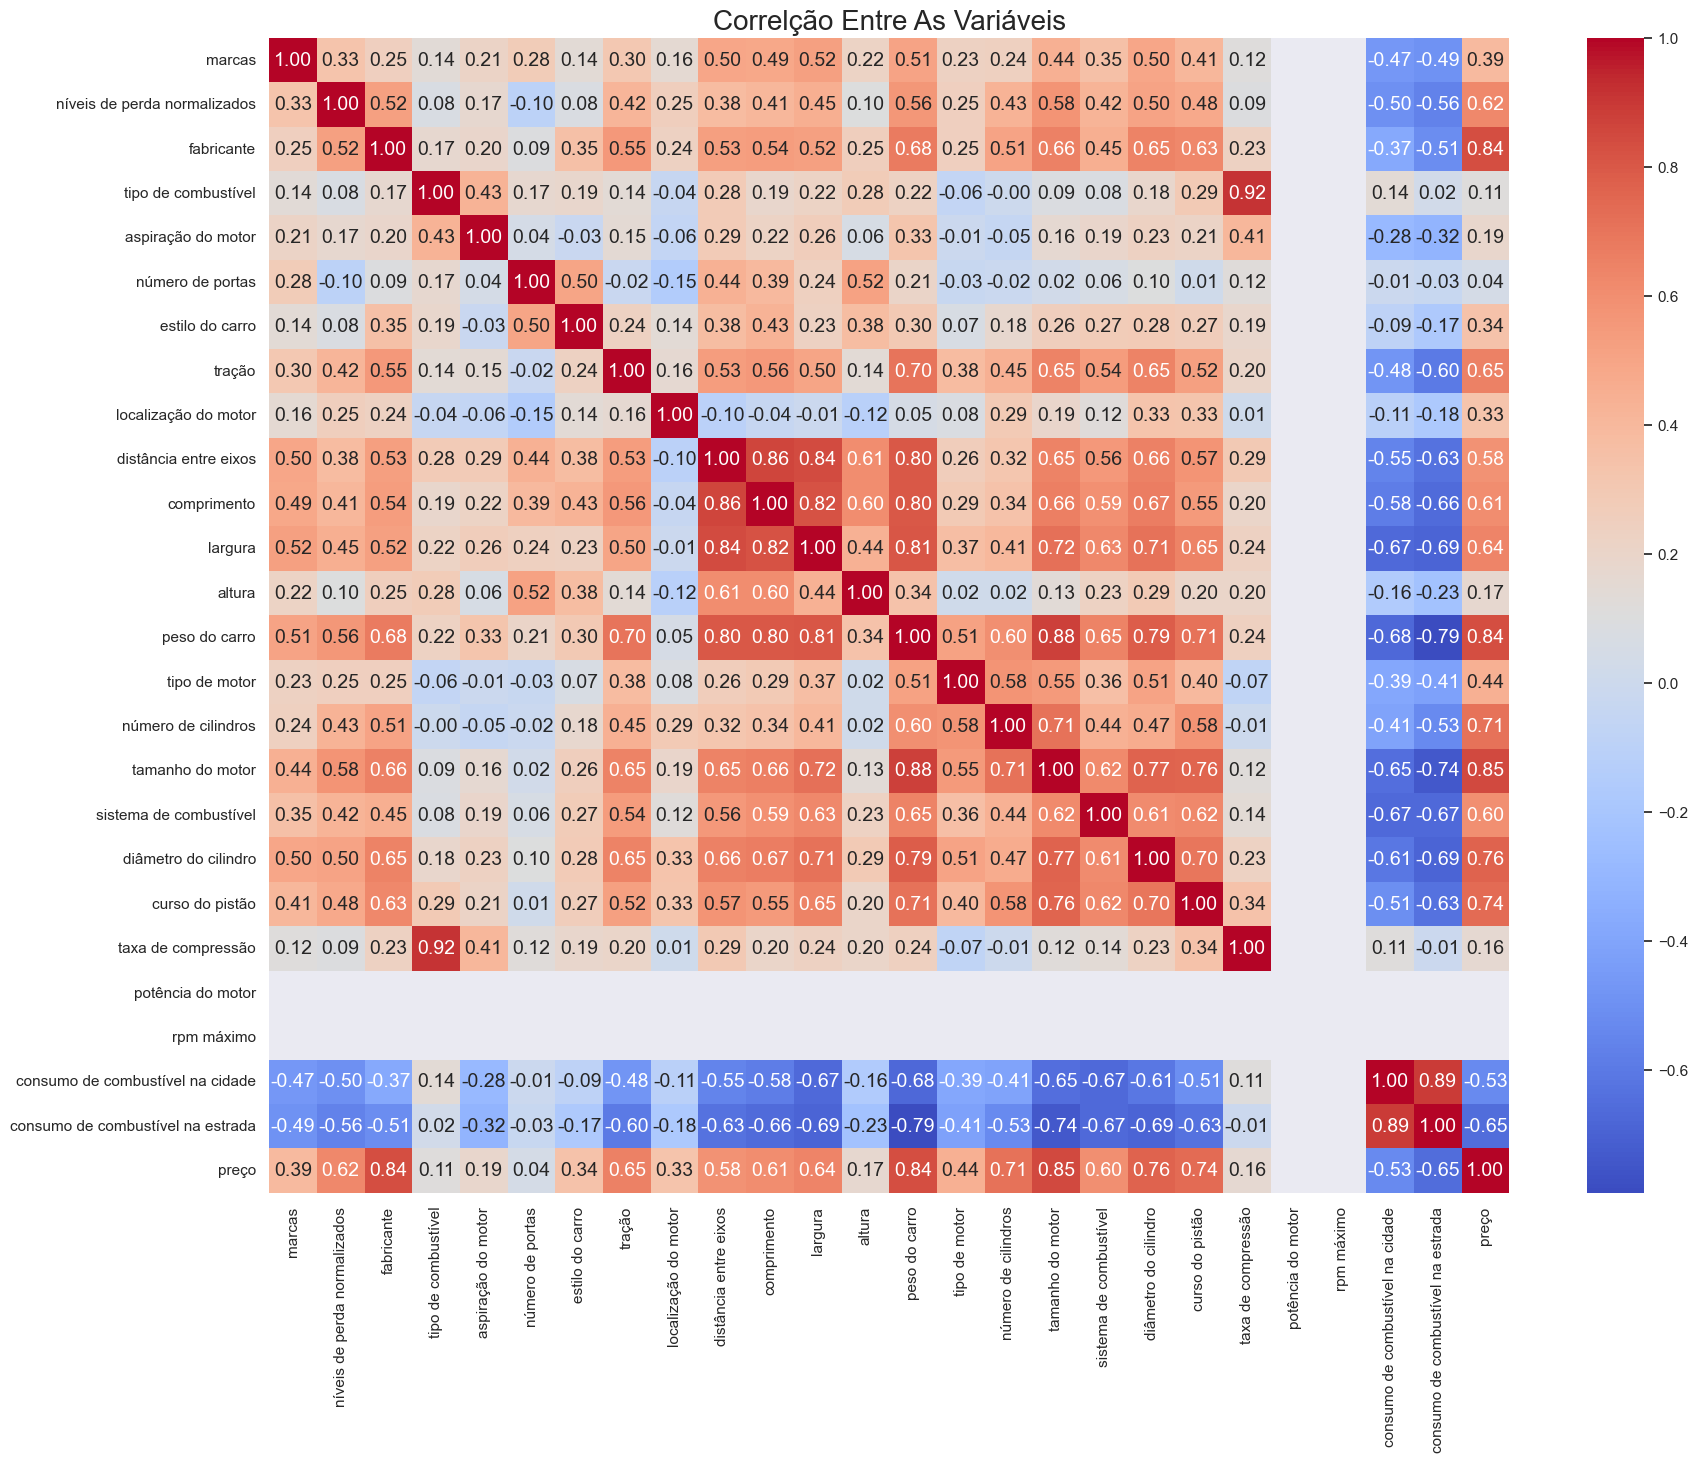

In [42]:
correlacao = dataset_carros.corr()
plt.figure(figsize=(20,15))
plt.title('Correlção Entre As Variáveis', fontsize=20)
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'fontsize': 14})
